# Multiple integrals

## Example multiple integrals

### Example 5.1: Plotting a surface $z=f(x,y)$ and the rectangular domain D

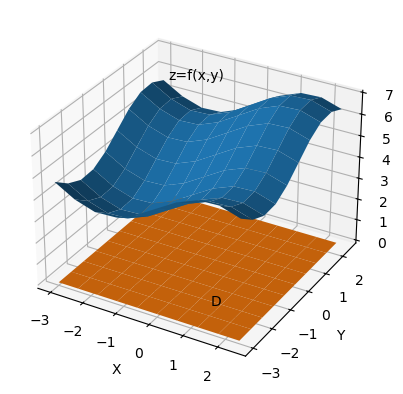

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# surface plot for z=5+sin(x)+sin(y)
x = np.arange(-3, 3, 0.6)
y = np.arange(-3, 3, 0.6)

X, Y = np.meshgrid(x, y)
Z = 5 + np.sin(X) + np.sin(Y)

fig = plt.figure()
axes = fig.add_subplot(projection='3d')

axes.plot_surface(X, Y, Z)
axes.plot_surface(X, Y, 0*X)

axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_zlabel('Z')

axes.text(-2.6, 2, 6, 'z=f(x,y)')
axes.text(1, -2, 0, 'D')
plt.show()

## 5.2 Evaluation of double integrals

### 5.2.1 The evaluation of double integrals over a rectangular domain

### Example 5.3: Evaluating the mass M of an object with non-uniform density

In [4]:
from sympy import symbols, integrate
a, x, y = symbols('a, x, y', real=True)

f = a * y
res1 = integrate(f, (y, 3, 6), (x, 2, 4))
print(res1)

27*a


In [5]:
res2 = integrate(f, (x, 2, 4), (y, 3, 6))
print(res2)

27*a


### The evaluation of double integrals over a non-rectangular domain

### Example 5.3: The total mass of a 2D object with non-uniform density

In [6]:
from sympy import symbols, integrate, sqrt

x, y, k = symbols('x, y, k', real=True)
f = k*(x+y)

integraly = integrate(f, (y, x**2, 1), (x, 0, 1))  # vary y first
integralx = integrate(f, (x, 0, sqrt(y)), (y, 0, 1))  # vary x first

print('Integral of f=x+y with y-integration first is =', integraly)
print('Integral of f=x+y with x-integration first is:', integralx)

Integral of f=x+y with y-integration first is = 13*k/20
Integral of f=x+y with x-integration first is: 13*k/20


## 5.3 Evaluation of triple integrals

### Example 5.4: Total electric charge Q in a non-uniform charge density

In [8]:
from sympy import symbols, integrate

x, y, z, a = symbols('x, y, z, a', real=True)

f = a*z  # function to integrate
integralxy = integrate(f, (x, 0, 1-y), (y, 0, 1), (z, 0, 1))  # x-then-y
integralyx = integrate(f, (y, 0, 1-x), (x, 0, 1), (z, 0, 1))  # x-then-y

print(integralxy)
print(integralyx)

a/4
a/4


### Example 5.5: Evaluating the center of mass of uniform 3D object

In [9]:
from sympy import symbols, integrate
x, y, z, a = symbols('x, y, z, a', real=True)
f = a*z

integral1 = integrate(f, (z, 0, 1-x-y), (x, 0, 1-y), (y, 0, 1))
print(integral1)
M = integrate(a, (z, 0, 1-x-y), (x, 0, 1-y), (y, 0, 1))
print(M)
print(integral1/M)

a/24
a/6
1/4


## 5.4 Change of variables in multiple integrals

### Example 5.6: The gravitational force exerted by a disk on point mass m

In [11]:
from sympy import symbols, integrate, simplify, pi

rho, a, b, R, phi, A = symbols('rho, a, b, R, phi, A', real=True, positive=True)

f = a * rho / ((rho**2+a**2)**(3/2))

res1 = integrate(f, (rho, 0, R), (phi, 0, 2*pi))
print(simplify(res1))

-2.0*pi*a/(R**2 + a**2)**0.5 + 2.0*pi


### 5.4.2 Using cylindrical coordinates

In [14]:
from sympy import symbols, Poly, integrate, pi

rho, phi, z, H, R, m = symbols('rho, phi, z, H, R, m ', real=True)
V = pi*R**2*H/3
I = integrate(rho**3, (z, rho*H/R,H), (rho, 0, R), (phi, 0, 2*pi))*m/V
print(I)

3*R**2*m/10


### 5.4.3 Using spherical coordinates

### Example 5.8: Gravitional force between a hemisphere and mass m

In [15]:
from sympy import symbols, integrate, pi, sin, cos

G, m, M, r, R, theta, phi = symbols('G, m, M, r, R, theta, phi', real=True)

rho = M/((2*pi*R**3)/3)
f = G*m*rho*cos(theta)*sin(theta)

res1 = integrate(f, (r, 0, R), (phi, 0, 2*pi), (theta, 0, pi/2))
print(res1)

3*G*M*m/(2*R**2)


## 5.5 Application of multiple integrals: Moment of inertia tensor

It is important to remember that the elements of the inertia tensor depend on the choice of origin of the coordinate system.

### Example 5.9 Moment of inertia tensor of a square plate

In [19]:
from sympy import symbols, integrate, Matrix
import pprint
x, y, a, M = symbols('x, y, a, M', real=True)

# evaluate the integrals using triple integration in SymPy
Ixx = Iyy = integrate(x**2, (x, 0, a), (y, 0, a))*M/a**2
Izz = integrate(x**2+y**2, (x, 0, a), (y, 0, a))*M/a**2

print(Ixx, Iyy, Izz)

M*a**2/3 M*a**2/3 2*M*a**2/3


In [25]:
Ixy = Iyx = -integrate(x*y, (x, 0, a), (y, 0, a))*M/a**2
print(Ixy)
Ixz = Iyz = 0
I = Matrix([[Ixx, Ixy, Ixz], [Ixy, Iyy, Iyz], [Ixz, Iyz, Izz]])
print(I)

pp = pprint.PrettyPrinter(width=41, compact=True)
pp.pprint(I)

-M*a**2/4
Matrix([[M*a**2/3, -M*a**2/4, 0], [-M*a**2/4, M*a**2/3, 0], [0, 0, 2*M*a**2/3]])
Matrix([
[ M*a**2/3, -M*a**2/4,          0],
[-M*a**2/4,  M*a**2/3,          0],
[        0,         0, 2*M*a**2/3]])


### Example 5.10: The moment of inertia tensor of a cube

In [26]:
from sympy import symbols, integrate, Matrix
import pprint

x, y, z, a, m = symbols('x, y, z, a, m', real=True)

# Evaluate the integrals using triple integration in SymPy
Ixx = Iyy = Izz = integrate(y**2+x**2, (x, 0, a), (y, 0, a), (z, 0, a))*m/a**3
Ixy = Ixz = Iyz = -integrate(x*y, (x, 0, a), (y, 0, a), (z, 0, a))*m/a**3

I = Matrix([[Ixx, Ixy, Ixz], [Ixy, Iyy, Iyz], [Ixz, Iyz, Izz]])

pp = pprint.PrettyPrinter(width=41, compact=True)
pp.pprint(I)

Matrix([
[2*a**2*m/3,  -a**2*m/4,  -a**2*m/4],
[ -a**2*m/4, 2*a**2*m/3,  -a**2*m/4],
[ -a**2*m/4,  -a**2*m/4, 2*a**2*m/3]])


### 5.5.1 Numerical evaluation of multiple integrals

### Example 5.11: The moment of inertia tensor of a triangular plate

In [27]:
from scipy.integrate import dblquad
import numpy as np
from sympy import symbols

yupper = lambda x: 1-x

# function to integrate i, from y=0 to 1-x, and x from 0 to 1
def f(i):
    return dblquad(i, 0, 1, 0, yupper)[0]

# x * y is the density of the triangular plate
Ixx = Iyy = lambda y, x: (y**2)*x*y
Izz = lambda y, x: (y**2+x**2)*x*y

Ixy = lambda y, x: -(x*y)*x*y
Ixz = Iyz = 0

I =np.array([[f(Ixx),f(Ixy),Ixz],[f(Ixy),f(Iyy),Iyz],\
[Ixz,Iyz,f(Izz)]])

print(I)

[[ 0.00833333 -0.00555556  0.        ]
 [-0.00555556  0.00833333  0.        ]
 [ 0.          0.          0.01666667]]


### Example 5.12: The moment of inertia tensor of a triangular pyramid

In [28]:
from scipy.integrate import tplquad
import numpy as np
from sympy import symbols

z2 = lambda y, z: 1-y-z  # upper limit for z integration
x2 = lambda z: 1-z  # upper limit for x integration

def f(i):
    return tplquad(i, 0, 1, 0, x2, 0, z2)[0]

Ixx = lambda z, y, x: (y**2+z**2)
Iyy = lambda z, y, x: (x**2+z**2)
Izz = lambda z, y, x: (y**2+x**2)

Ixy = lambda z, y, x: -x*y
Ixz = lambda z, y, x: -x*z
Iyz = lambda z, y, x: -y*z

I =np.array([[f(Ixx),f(Ixy),f(Ixz)],[f(Ixy),f(Iyy),f(Iyz)],\
[f(Ixz),f(Iyz),f(Izz)]])
print('Moment ofinertiatensorI=')
print(I)

Moment ofinertiatensorI=
[[ 0.03333333 -0.00833333 -0.00833333]
 [-0.00833333  0.03333333 -0.00833333]
 [-0.00833333 -0.00833333  0.03333333]]
